#     Sale Analysis

### Introduction:

In this Notebook, we are analyzing the  12 months worth of sales data of an electronics store, to get some useful business insights about the Sales and market trend.
Each month purchase data in a separate CSV file.  I have below combined these files for annual analysis and have performed some data cleaning for better analysis.

In [89]:
#Libraries
import pandas as pd
import os
import matplotlib.pyplot as plt
from datetime import date
import calendar

In [4]:
df = pd.read_csv('C:\\Users\\saham\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\Sales_April_2019.csv')


# a quick analysis to get a feel for the data
df.head()
print("dataframe df' size (n*m) = ",df.size)
print("dataframe df' shape (rows, col) = ",df.shape)
print("dataframe' dimension: ",df.ndim)

In [7]:
# read all files in a directory : (list all files in dir)

files = [file for file in os.listdir('C:\\Users\\saham\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\')]

for file in files:
    print(file)

# Lets concatenate all 12 csv into 1 csv file 
all_months_data = pd.DataFrame()  

for file in files:
    df = pd.read_csv( 'C:\\Users\\saham\\Pandas-Data-Science-Tasks-master\\SalesAnalysis\\Sales_Data\\' + file)
    all_months_data = pd.concat([ all_months_data , df ])

# checking if all csv are concatenated
print("dataframe all_months_data' size (n*m) = ",all_months_data.size)
print("dataframe all_months_data df' shape (rows, col) = ",all_months_data.shape)
print("dataframe' all_months_data dimension: ",all_months_data.ndim)

In [11]:
all_months_data.to_csv("all_data.csv" , index=False)


# Cleaning and prepping dataframe for Analysis

### step 1 : remove all NaN or missing values


In [14]:
all_nan = all_months_data[all_months_data.isna().any(axis=1)]

all_months_data = all_months_data.dropna(how = 'all')

In [18]:
### step 2 : Convert "Order Date " column into separate , Month , Date column 

all_months_data['Month'] = all_months_data["Order Date"].str[0:2]


#all_months_data['Month'].unique()

or_months = all_months_data['Month'].values == 'Or'
or_months_df = all_months_data[or_months]
or_months_df

array(['04', '05', 'Or', '08', '09', '12', '01', '02', '03', '07', '06',
       '11', '10'], dtype=object)

### Step 2 : Drop duplicate rows


In [23]:
# its looks like 355 rows in our dataset has this noise data . lets drop it 

all_months_data = all_months_data[all_months_data['Month'] != 'Or']




all_months_data['Month'] = all_months_data['Month'].astype('int32')

# correcting dat types of these two columns
all_months_data['Quantity Ordered'] = pd.to_numeric(all_months_data['Quantity Ordered'])
all_months_data['Price Each'] = pd.to_numeric(all_months_data['Price Each'])

### Step 3: Adding sales column

In [24]:
all_months_data['Sales'] = all_months_data['Price Each'] * all_months_data['Quantity Ordered']

### Step 4 : Add separate "city "  column

In [26]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]

all_months_data["City State"] = all_months_data["Purchase Address"].apply(lambda x: get_city(x) + ' ' + get_state(x))


In [28]:

all_months_data["City State"].unique()

array([' Dallas TX', ' Boston MA', ' Los Angeles CA', ' San Francisco CA',
       ' Seattle WA', ' Atlanta GA', ' New York City NY', ' Portland OR',
       ' Austin TX', ' Portland ME'], dtype=object)

### Step 5:  Convert the "order date" column into a datetime datatype

In [65]:
all_months_data["Order Date"] = pd.to_datetime(all_months_data["Order Date"])

all_months_data["Hour"] =all_months_data["Order Date"].dt.hour
all_months_data["Minute"] =all_months_data["Order Date"].dt.minute

all_months_data["Date"] =all_months_data["Order Date"].dt.date

all_months_data["Month"] =all_months_data["Order Date"].dt.month

### Here is What the dataset looks like after cleaning

In [90]:
all_months_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City State,Hour,Minute,Day,Date
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8,46,19,2019-04-19
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22,30,7,2019-04-07
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,38,12,2019-04-12
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,38,12,2019-04-12
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9,27,30,2019-04-30


# Q1: In which month did we had the best sale? How much was earned that month?

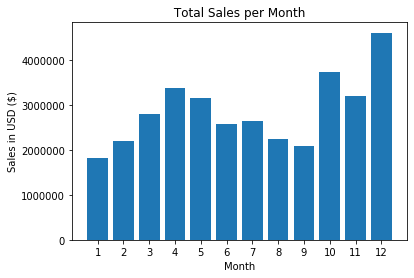

In [92]:
results =  all_months_data.groupby('Month').sum()


months = range(1,13)
plt.bar(months, results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')
plt.title(" Total Sales per Month ")
plt.show()




It's clear from the above plot that the company made the maximum sales in October, November, and December.
Between April to September, the monthly sales are constantly decreasing, which is something a company may wanna look further into.

### Q2 :  Which city has the highest number of Sales ?

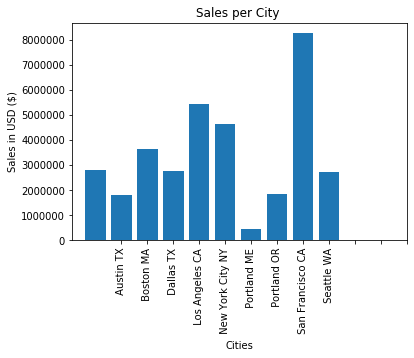

In [93]:
results =  all_months_data.groupby('City State').sum()

cities = [city for city , df in all_months_data.groupby('City State')]
plt.bar(cities, results['Sales'])
plt.xticks(months, rotation = 'vertical')
plt.ylabel('Sales in USD ($)')
plt.xlabel('Cities')
plt.title("Sales per City ")
plt.show()

We can see above that San Francisco Has the highest Sales, second in  LA. Portland got the smallest sales. The difference between the Sales in San Francisco to that of Portland is something the company should further look into. There could be multiple factors affecting these Sales like the size of the city, investment in advertisements, average income, etc.

### Q3 : How was the sales trend over the year? When are the customers more likely to make a purchase?


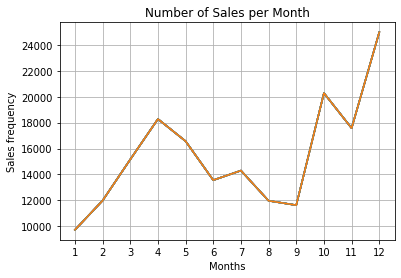

In [69]:
months = [m for m, df in all_months_data.groupby('Month')]
plt.plot(months, all_months_data.groupby('Month').count())

plt.xticks(months)
plt.ylabel('Sales frequency')
plt.xlabel('Months')
plt.title("Number of Sales per Month")
plt.grid()
plt.show()

The Sales trend throughout the year is jagged, we can see a significant increase in sales in December, which could be due to Christmas.
Between April to September there is a constant fall in Sales. It is important to analyze what's causing this fall. Giving out better deals around august and September could prevent this dip.

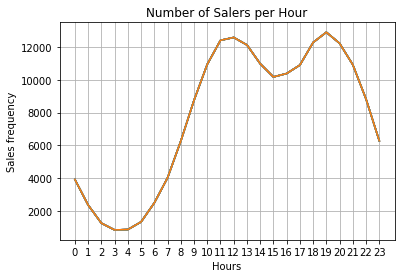

In [59]:
hours = [hour for hour, df in all_months_data.groupby('Hour')]
plt.plot(hours, all_months_data.groupby('Hour').count())

plt.xticks(hours)
plt.ylabel('Sales frequency')
plt.xlabel('Hours')
plt.title("Number of Sales per Hour")
plt.grid()
plt.show()

The trend we see above is quite intuitive. The average sale frequency is maximum around 11 to 12:00 am, also 7 pm. 

### Q 4 : What products are most often sold together?

In [71]:
df = all_months_data[all_months_data['Order ID'].duplicated(keep=False)]

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID' , 'Grouped']].drop_duplicates()

df.head()

C:\Users\saham\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [78]:
from itertools import combinations
from collections import Counter

count = Counter()
for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 3)))
        

for key, value in count.most_common(10):
    print(key, value)

('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') 87
('iPhone', 'Lightning Charging Cable', 'Wired Headphones') 62
('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') 47
('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 35
('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') 33
('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') 27
('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 24
('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') 16
('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') 5
('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Headphones') 5


A list of 3 Items that are most often ordered together. It's valuable data  for implementing plans and deals for  increasing the Sale

### Q3 : What product sold the most? Why do you think it sold the most?

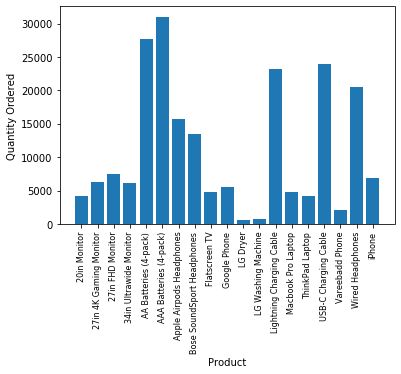

In [81]:
product_group = all_months_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']
products = [pro for pro , df in product_group]

plt.bar(products, quantity_ordered)
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.xticks(products, rotation = 'vertical', size = 8)


plt.show()


The above plot shows the Sale of each product throughout the year. Out of all product five product namely AAA Batteries, Charging Cable, Wired headphones, etc, products has significantly higher demand. We can look at the price of these products to see if there is any correlation we can find.

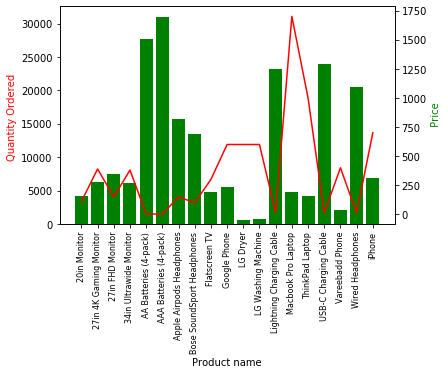

In [88]:
prices = all_months_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products, quantity_ordered, color = 'g')
ax2.plot(products, prices, 'r-')

ax1.set_xlabel('Product name')
ax1.set_ylabel('Quantity Ordered ', color ='r' )
ax2.set_ylabel(' Price' , color = 'g')

ax1.set_xticklabels(products, rotation = 'vertical' , size = 8 )

plt.show()

The plot above shows a strong correlation between price and total products ordered in the year. The company sold much more of the cheaper products than the expensive ones. 